In [45]:
#Comenzaremos cargando los dígitos y luego encontrando los KMeansgrupos

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [46]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
#La agrupación se puede realizar como lo hicimos antes:

In [52]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In [ ]:
#El resultado son 10 clústeres en 64 dimensiones.

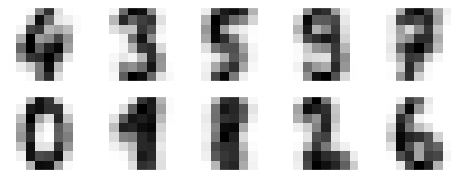

In [53]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
#KMeanses capaz de encontrar grupos cuyos centros son dígitos reconocibles, quizás con la excepción de 1 y 8

In [54]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
#Ahora podemos verificar qué tan precisa fue nuestra agrupación no supervisada para encontrar dígitos similares dentro de los datos:

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

In [ ]:
#¡ Con solo un simple algoritmo k -means, descubrimos la agrupación correcta para el 80% de los dígitos de entrada! Revisemos la matriz de confusión para esto:

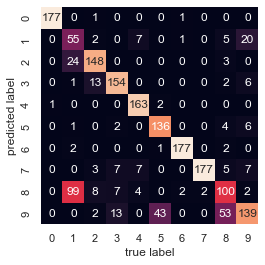

In [56]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
#Como cabría esperar de los centros de los cúmulos que visualizamos antes, el principal punto de confusión está entre los ochos y los unos.

In [57]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


0.9432387312186978

In [ ]:
#Eso es casi un 92% de precisión de clasificación sin usar las etiquetas . Este es el poder del aprendizaje no supervisado cuando se usa con cuidado: puede extraer información del conjunto de datos que podría ser difícil de hacer a mano oa simple vista.

In [ ]:
#CONCLUSION : Eso es casi un 95% de precisión de clasificación sin usar las etiquetas . Este es el poder del aprendizaje no supervisado cuando se usa con cuidado: puede extraer información del conjunto de datos que podría ser difícil de hacer a mano La simple vista.